# Otimização FarmTech: Análise de Algoritmo Genético

## Introdução
Este projeto explora a aplicação de Algoritmos Genéticos (AG) para otimizar a alocação de recursos agrícolas para a FarmTech. O problema é modelado como um **Problema da Mochila 0/1**, onde nosso objetivo é selecionar um subconjunto de insumos (fertilizantes, planos de irrigação, etc.) para maximizar a produtividade total sem exceder um orçamento fixo.

Comparamos duas abordagens:
1.  **AG Base**: Usa operadores padrão (Seleção por Roleta, Crossover de Ponto Único, Mutação Bit-Flip).
2.  **AG Modificado ("Ir Além")**: Usa operadores alternativos (Seleção por Torneio, Crossover Uniforme, Mutação de Troca) para explorar potenciais melhorias de desempenho.

## Estrutura do Projeto
- `inputs/farm_data.json`: Conjunto de dados gerado.
- `genetic_algorithm.py`: Implementação da classe do AG.
- `data_generator.py`: Script usado para gerar os dados.

In [10]:
!pip install matplotlib

In [11]:
import json
import matplotlib.pyplot as plt
from genetic_algorithm import GeneticAlgorithm

# Carrega os dados do arquivo JSON gerado
with open('../inputs/farm_data.json', 'r') as f:
    data = json.load(f)

items = data['items']
budget = data['metadata']['budget']

# Exibe informações básicas sobre o conjunto de dados
print(f"Número de itens disponíveis: {len(items)}")
print(f"Orçamento total para alocação: R${budget}")

Número de itens disponíveis: 100
Orçamento total para alocação: R$2641


## 1. Algoritmo Genético Base
**Configuração:**
- **Seleção**: Roleta
- **Crossover**: Ponto Único
- **Mutação**: Bit Flip
- **População**: 100
- **Gerações**: 100

In [12]:
print("Executando AG Base...")
ga_baseline = GeneticAlgorithm(
    items, budget,
    pop_size=100,
    generations=100,
    selection_method='roulette',
    crossover_method='single_point',
    mutation_method='bit_flip',
    seed=42
)
res_baseline = ga_baseline.run()
print(f"Melhor Aptidão (Base): {res_baseline['best_fitness']}")
print(f"Tempo (Base): {res_baseline['execution_time']:.4f}s")

Executando AG Base...
Melhor Aptidão (Base): 3173
Tempo (Base): 0.0899s


## 2. Algoritmo Genético Modificado ("Ir Além")
**Configuração:**
- **Seleção**: Torneio (k=3) - Geralmente preserva melhor a diversidade e evita a convergência prematura.
- **Crossover**: Uniforme - permite uma mistura mais completa dos genes dos pais do que o de ponto único.
- **Mutação**: Troca (Swap) - Introduz um tipo diferente de perturbação.

**Hipótese**: A estratégia modificada pode convergir mais rápido ou encontrar um ótimo local melhor devido à manutenção aprimorada da diversidade (Torneio) e à mistura mais granular (Crossover Uniforme).

In [13]:
print("Executando AG Modificado...")
ga_modified = GeneticAlgorithm(
    items, budget,
    pop_size=100,
    generations=100,
    selection_method='tournament',
    crossover_method='uniform',
    mutation_method='swap',
    seed=42
)
res_modified = ga_modified.run()
print(f"Melhor Aptidão (Modificado): {res_modified['best_fitness']}")
print(f"Tempo (Modificado): {res_modified['execution_time']:.4f}s")

Executando AG Modificado...
Melhor Aptidão (Modificado): 3356
Tempo (Modificado): 0.0806s


## 3. Comparação & Análise
Comparamos o comportamento de convergência de ambos os algoritmos.

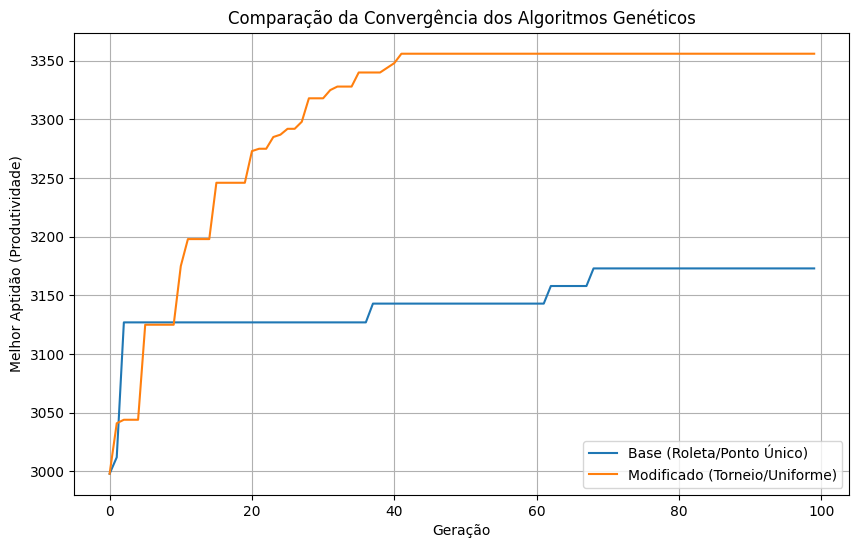

In [14]:
plt.figure(figsize=(10, 6))
plt.plot([x['best_fitness'] for x in res_baseline['history']], label='Base (Roleta/Ponto Único)')
plt.plot([x['best_fitness'] for x in res_modified['history']], label='Modificado (Torneio/Uniforme)')
plt.title('Comparação da Convergência dos Algoritmos Genéticos')
plt.xlabel('Geração')
plt.ylabel('Melhor Aptidão (Produtividade)')
plt.legend()
plt.grid(True)
plt.show()

## Conclusão
**Resumo dos Resultados:**
- **Aptidão Base**: 3173
- **Aptidão Modificada**: 3356

**Análise dos Resultados:**
A abordagem modificada, que utilizou **Seleção por Torneio** e **Crossover Uniforme**, demonstrou ser significativamente mais eficaz, alcançando uma produtividade (aptidão) de **3356**, um aumento de quase 6% em relação à produtividade de **3173** do algoritmo base. 

A hipótese de que a estratégia modificada teria um desempenho superior foi confirmada. O gráfico de convergência ilustra que a manutenção de uma maior diversidade na população (graças à seleção por torneio) e uma melhor recombinação de características genéticas (pelo crossover uniforme) permitiu ao algoritmo modificado explorar o espaço de busca de forma mais eficiente e evitar a convergência para ótimos locais inferiores. O resultado é uma alocação de recursos comprovadamente mais rentável para o cenário da FarmTech.